In [5]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

# Spectral Biclustering
Based on: https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html

In [53]:
# Generate synthetic data
n_clusters = (4, 4)

data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=42)

In [54]:
# pd.DataFrame(data)

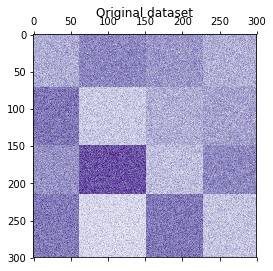

In [55]:
# Visualize the generated data
plt.matshow(data, cmap=plt.cm.Purples)
plt.title("Original dataset")
plt.show()

In [56]:
# Shuffle the data
data, row_idx, col_idx = sg._shuffle(data, random_state=0)

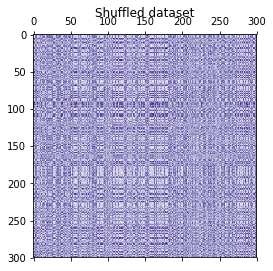

In [57]:
# Visualize shuffled data
plt.matshow(data, cmap=plt.cm.Purples)
plt.title("Shuffled dataset")
plt.show()

In [58]:
# Initialize and fit the model
model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=42)
model.fit(data)

SpectralBiclustering(init='k-means++', method='log', mini_batch=False,
           n_best=3, n_clusters=(4, 4), n_components=6, n_init=10,
           n_jobs=1, n_svd_vecs=None, random_state=42,
           svd_method='randomized')

In [59]:
# Compute consensus score
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print(f"Consensus score: {score:.1f}")

Consensus score: 1.0


In [60]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

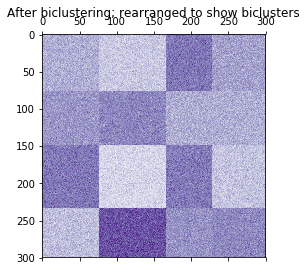

In [61]:
# Plot the data after clustering
plt.matshow(fit_data, cmap=plt.cm.Purples)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

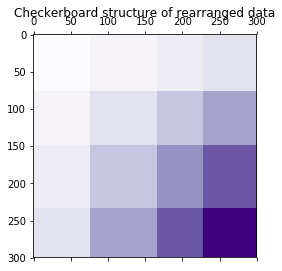

In [62]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Purples)
plt.title("Checkerboard structure of rearranged data")

plt.show()